# Before your start:
- Read the README.md file
- Comment as much as you can and use the resources in the README.md file
- Happy learning!

In [1]:
# Import your libraries:

%matplotlib inline

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
import re

In this lab, we will explore a dataset that describes websites with different features and labels them either benign or malicious . We will use supervised learning algorithms to figure out what feature patterns malicious websites are likely to have and use our model to predict malicious websites.

# Challenge 1 - Explore The Dataset

Let's start by exploring the dataset. First load the data file:

In [2]:
websites = pd.read_csv('../website.csv')

#### Explore the data from an bird's-eye view.

You should already been very familiar with the procedures now so we won't provide the instructions step by step. Reflect on what you did in the previous labs and explore the dataset.

Things you'll be looking for:

* What the dataset looks like?
* What are the data types?
* Which columns contain the features of the websites?
* Which column contains the feature we will predict? What is the code standing for benign vs malicious websites?
* Do we need to transform any of the columns from categorical to ordinal values? If so what are these columns?

Feel free to add additional cells for your explorations. Make sure to comment what you find out.

In [3]:
# Your code here
websites.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1781 entries, 0 to 1780
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   URL                        1781 non-null   object 
 1   URL_LENGTH                 1781 non-null   int64  
 2   NUMBER_SPECIAL_CHARACTERS  1781 non-null   int64  
 3   CHARSET                    1781 non-null   object 
 4   SERVER                     1780 non-null   object 
 5   CONTENT_LENGTH             969 non-null    float64
 6   WHOIS_COUNTRY              1781 non-null   object 
 7   WHOIS_STATEPRO             1781 non-null   object 
 8   WHOIS_REGDATE              1781 non-null   object 
 9   WHOIS_UPDATED_DATE         1781 non-null   object 
 10  TCP_CONVERSATION_EXCHANGE  1781 non-null   int64  
 11  DIST_REMOTE_TCP_PORT       1781 non-null   int64  
 12  REMOTE_IPS                 1781 non-null   int64  
 13  APP_BYTES                  1781 non-null   int64

In [4]:
pd.set_option('display.max_columns', None)
websites.head()

,URL,URL_LENGTH,NUMBER_SPECIAL_CHARACTERS,CHARSET,SERVER,CONTENT_LENGTH,WHOIS_COUNTRY,WHOIS_STATEPRO,WHOIS_REGDATE,WHOIS_UPDATED_DATE,TCP_CONVERSATION_EXCHANGE,DIST_REMOTE_TCP_PORT,REMOTE_IPS,APP_BYTES,SOURCE_APP_PACKETS,REMOTE_APP_PACKETS,SOURCE_APP_BYTES,REMOTE_APP_BYTES,APP_PACKETS,DNS_QUERY_TIMES,Type
0,M0_109,16,7,iso-8859-1,nginx,263.0,None,None,10/10/2015 18:21,None,7,0,2,700,9,10,1153,832,9,2.0,1
1,B0_2314,16,6,UTF-8,Apache/2.4.10,15087.0,None,None,None,None,17,7,4,1230,17,19,1265,1230,17,0.0,0
2,B0_911,16,6,us-ascii,Microsoft-HTTPAPI/2.0,324.0,None,None,None,None,0,0,0,0,0,0,0,0,0,0.0,0
3,B0_113,17,6,ISO-8859-1,nginx,162.0,US,AK,7/10/1997 4:00,12/09/2013 0:45,31,22,3,3812,39,37,18784,4380,39,8.0,0
4,B0_403,17,6,UTF-8,None,124140.0,US,TX,12/05/1996 0:00,11/04/2017 0:00,57,2,5,4278,61,62,129889,4586,61,4.0,0


In [5]:
#Pasaremos las columnas de objeto a datatime para las que tiene un formato de fecha

In [6]:
websites.WHOIS_REGDATE = websites.WHOIS_REGDATE.replace('None',np.nan)

In [7]:
websites.WHOIS_REGDATE = websites.WHOIS_REGDATE.str.replace('T', ' ')
websites.WHOIS_REGDATE = websites.WHOIS_REGDATE.str.replace(':\d\d.0Z', '')
websites.WHOIS_REGDATE = websites.WHOIS_REGDATE.str.replace('-', '/')

In [8]:
websites.WHOIS_REGDATE = websites.WHOIS_REGDATE.str.replace('2002/03/20 23:59', '20/03/2002 23:59')

In [9]:
websites.WHOIS_REGDATE = websites.WHOIS_REGDATE.replace('b',np.nan)

In [10]:
websites.WHOIS_REGDATE = websites.WHOIS_REGDATE.replace('0',np.nan)

In [11]:

websites.WHOIS_REGDATE = pd.to_datetime(websites.WHOIS_REGDATE, format="%d/%m/%Y %H:%M")


In [12]:
websites.WHOIS_UPDATED_DATE = websites.WHOIS_UPDATED_DATE.replace('None',np.nan)

In [13]:
websites.WHOIS_UPDATED_DATE = websites.WHOIS_UPDATED_DATE.str.replace('T', ' ')
websites.WHOIS_UPDATED_DATE = websites.WHOIS_UPDATED_DATE.str.replace(':\d\d.0Z', '')
websites.WHOIS_UPDATED_DATE = websites.WHOIS_UPDATED_DATE.str.replace('-', '/')

In [14]:
websites.WHOIS_UPDATED_DATE = websites.WHOIS_UPDATED_DATE.str.replace('2017-03-07 02:38', '07/03/2017 02:38')

In [15]:
websites.WHOIS_UPDATED_DATE = websites.WHOIS_UPDATED_DATE.str.replace('2017/03/07 22:02', '07/03/2017 22:02')

In [16]:
websites.WHOIS_UPDATED_DATE = pd.to_datetime(websites.WHOIS_UPDATED_DATE, format="%d/%m/%Y %H:%M")

In [17]:
websites.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1781 entries, 0 to 1780
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   URL                        1781 non-null   object        
 1   URL_LENGTH                 1781 non-null   int64         
 2   NUMBER_SPECIAL_CHARACTERS  1781 non-null   int64         
 3   CHARSET                    1781 non-null   object        
 4   SERVER                     1780 non-null   object        
 5   CONTENT_LENGTH             969 non-null    float64       
 6   WHOIS_COUNTRY              1781 non-null   object        
 7   WHOIS_STATEPRO             1781 non-null   object        
 8   WHOIS_REGDATE              1651 non-null   datetime64[ns]
 9   WHOIS_UPDATED_DATE         1642 non-null   datetime64[ns]
 10  TCP_CONVERSATION_EXCHANGE  1781 non-null   int64         
 11  DIST_REMOTE_TCP_PORT       1781 non-null   int64         
 12  REMOTE

In [18]:
websites.CHARSET.value_counts()

UTF-8           676
ISO-8859-1      427
utf-8           379
us-ascii        155
iso-8859-1      134
None              7
windows-1251      1
ISO-8859          1
windows-1252      1
Name: CHARSET, dtype: int64

In [19]:
websites.Type.value_counts()

0    1565
1     216
Name: Type, dtype: int64

#### Next, evaluate if the columns in this dataset are strongly correlated.

In the Mushroom supervised learning lab we did recently, we mentioned we are concerned if our dataset has strongly correlated columns because if it is the case we need to choose certain ML algorithms instead of others. We need to evaluate this for our dataset now.

Luckily, most of the columns in this dataset are ordinal which makes things a lot easier for us. In the next cells below, evaluate the level of collinearity of the data.

We provide some general directions for you to consult in order to complete this step:

1. You will create a correlation matrix using the numeric columns in the dataset.

1. Create a heatmap using `seaborn` to visualize which columns have high collinearity.

1. Comment on which columns you might need to remove due to high collinearity.

<AxesSubplot:>

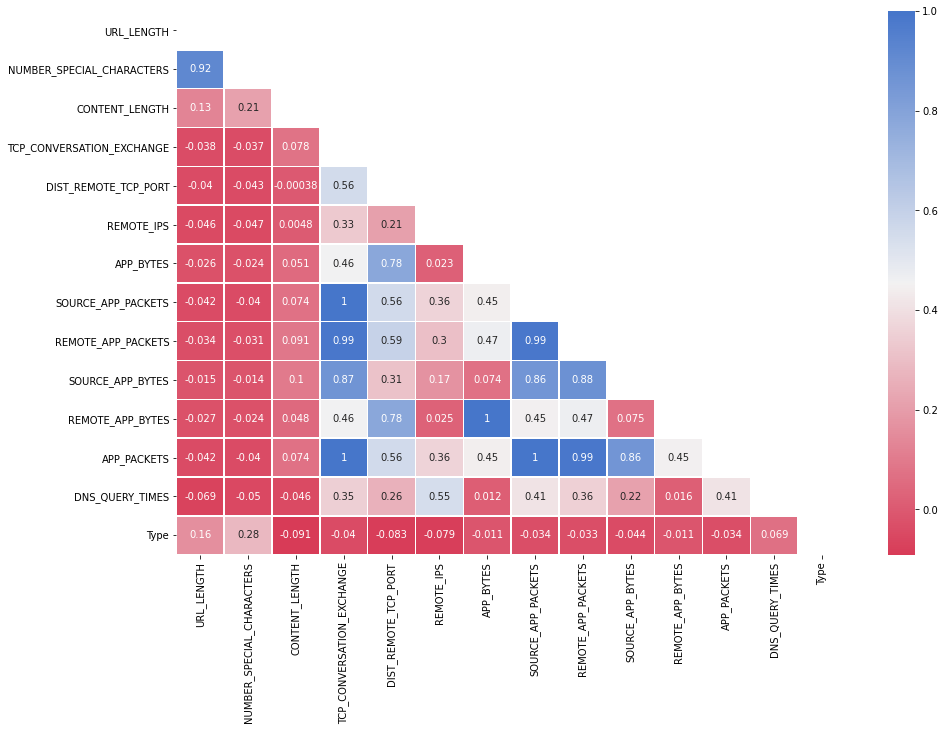

In [20]:
# Your comment here

mask = np.zeros_like(websites.corr(),dtype=np.bool)
mask[np.triu_indices_from(mask)]=True
plt.subplots(figsize=(15,10))
cmap = sns.diverging_palette(6,255,as_cmap=True)
sns.heatmap(websites.corr(),mask=mask,cmap=cmap,linewidths=.5,annot=True)

In [21]:
# Haciendo correlación y teniendo en cuenta que entre más color azul hay máyor correlacion
# Definimos que las variables a elimiinar podrían ser: TPC_CONVERSATION_EXCHANGE, SOURCE_APP_PACKETS
#REMOTE_APP_PACKETS

# Challenge 2 - Remove Column Collinearity.

From the heatmap you created, you should have seen at least 3 columns that can be removed due to high collinearity. Remove these columns from the dataset.

Note that you should remove as few columns as you can. You don't have to remove all the columns at once. But instead, try removing one column, then produce the heatmap again to determine if additional columns should be removed. As long as the dataset no longer contains columns that are correlated for over 90%, you can stop. Also, keep in mind when two columns have high collinearity, you only need to remove one of them but not both.

In the cells below, remove as few columns as you can to eliminate the high collinearity in the dataset. Make sure to comment on your way so that the instructional team can learn about your thinking process which allows them to give feedback. At the end, print the heatmap again.

In [22]:
# Vamos a eliminar REMOTE_APP_PACKETS ya que es la columna que tiene un 99% de correlación 
#con dos columnas y así podremos ver si hace falta eliminar más columnas
websites.drop('REMOTE_APP_PACKETS',axis=1,inplace=True)

<AxesSubplot:>

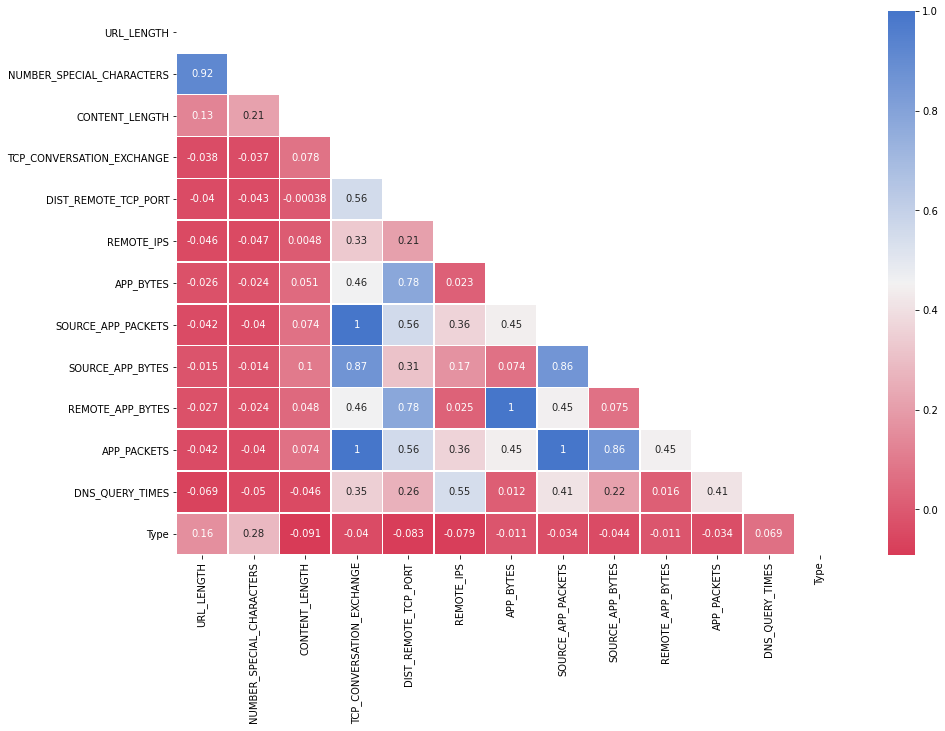

In [23]:
# Print heatmap again
mask = np.zeros_like(websites.corr(),dtype=np.bool)
mask[np.triu_indices_from(mask)]=True
plt.subplots(figsize=(15,10))
cmap = sns.diverging_palette(6,255,as_cmap=True)
sns.heatmap(websites.corr(),mask=mask,cmap=cmap,linewidths=.5,annot=True)

In [24]:
# Ahora las únicas columnas que presentan una correlación mayor a 90, son number_special_characteres
#y URL_LENGTH, en esta ocasión nos vamos a air por NUMBER_SPECIAL_CHARACTERS
websites.drop('NUMBER_SPECIAL_CHARACTERS',axis=1,inplace=True)

<AxesSubplot:>

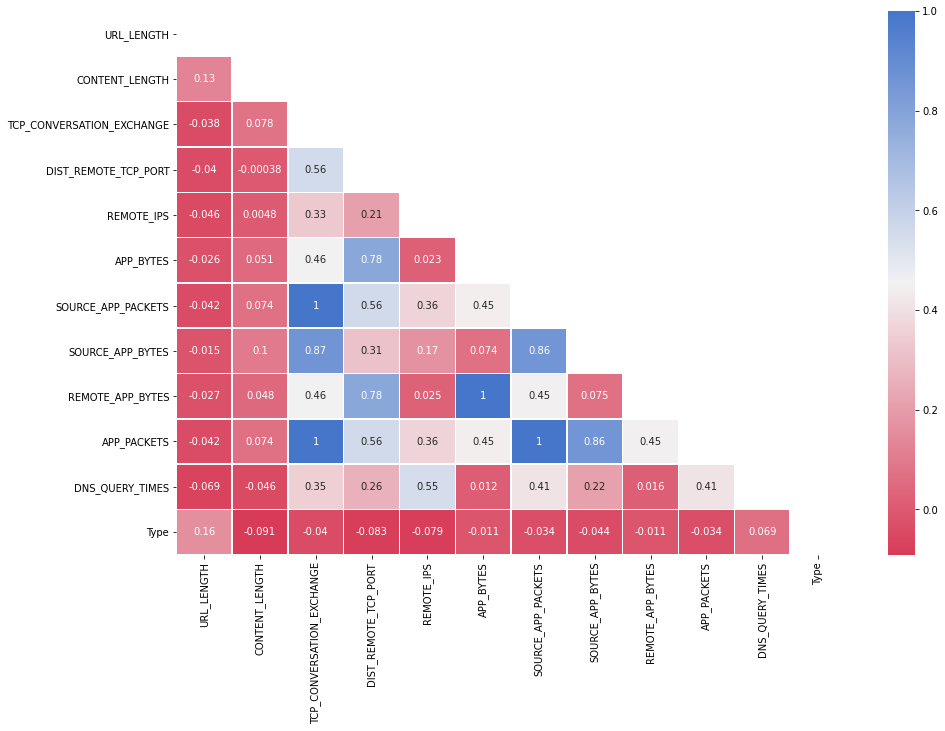

In [25]:
mask = np.zeros_like(websites.corr(),dtype=np.bool)
mask[np.triu_indices_from(mask)]=True
plt.subplots(figsize=(15,10))
cmap = sns.diverging_palette(6,255,as_cmap=True)
sns.heatmap(websites.corr(),mask=mask,cmap=cmap,linewidths=.5,annot=True)

In [26]:
#Ya no hace falta eliminar más columnas ya que no existe correlación mayor a 90% en ninguna 
#variable

# Challenge 3 - Handle Missing Values

The next step would be handling missing values. **We start by examining the number of missing values in each column, which you will do in the next cell.**

In [27]:
# Your code here
websites.isnull().sum()

URL                            0
URL_LENGTH                     0
CHARSET                        0
SERVER                         1
CONTENT_LENGTH               812
WHOIS_COUNTRY                  0
WHOIS_STATEPRO                 0
WHOIS_REGDATE                130
WHOIS_UPDATED_DATE           139
TCP_CONVERSATION_EXCHANGE      0
DIST_REMOTE_TCP_PORT           0
REMOTE_IPS                     0
APP_BYTES                      0
SOURCE_APP_PACKETS             0
SOURCE_APP_BYTES               0
REMOTE_APP_BYTES               0
APP_PACKETS                    0
DNS_QUERY_TIMES                1
Type                           0
dtype: int64

If you remember in the previous labs, we drop a column if the column contains a high proportion of missing values. After dropping those problematic columns, we drop the rows with missing values.

#### In the cells below, handle the missing values from the dataset. Remember to comment the rationale of your decisions.

In [28]:
# Your code here
websites.shape

(1781, 19)

In [29]:
# Your comment here
#Elimnaremos la columna de CONTENT_LENGTH debido a que casi el 50% de los datos son nulos, 
#y recalcular los espacios vacios podría sesgar la información
websites.drop('CONTENT_LENGTH',axis=1,inplace=True)
#En la columna DNS_QUERY_TIMES solo un dato es nulo, así que determinamos eliminarlo 
websites.dropna(inplace=True)

#### Again, examine the number of missing values in each column. 

If all cleaned, proceed. Otherwise, go back and do more cleaning.

In [30]:
# Examine missing values in each column
websites.isnull().sum()

URL                          0
URL_LENGTH                   0
CHARSET                      0
SERVER                       0
WHOIS_COUNTRY                0
WHOIS_STATEPRO               0
WHOIS_REGDATE                0
WHOIS_UPDATED_DATE           0
TCP_CONVERSATION_EXCHANGE    0
DIST_REMOTE_TCP_PORT         0
REMOTE_IPS                   0
APP_BYTES                    0
SOURCE_APP_PACKETS           0
SOURCE_APP_BYTES             0
REMOTE_APP_BYTES             0
APP_PACKETS                  0
DNS_QUERY_TIMES              0
Type                         0
dtype: int64

# Challenge 4 - Handle `WHOIS_*` Categorical Data

There are several categorical columns we need to handle. These columns are:

* `URL`
* `CHARSET`
* `SERVER`
* `WHOIS_COUNTRY`
* `WHOIS_STATEPRO`
* `WHOIS_REGDATE`
* `WHOIS_UPDATED_DATE`

How to handle string columns is always case by case. Let's start by working on `WHOIS_COUNTRY`. Your steps are:

1. List out the unique values of `WHOIS_COUNTRY`.
1. Consolidate the country values with consistent country codes. For example, the following values refer to the same country and should use consistent country code:
    * `CY` and `Cyprus`
    * `US` and `us`
    * `SE` and `se`
    * `GB`, `United Kingdom`, and `[u'GB'; u'UK']`

#### In the cells below, fix the country values as intructed above.

In [31]:
# Your code here
websites.WHOIS_COUNTRY.value_counts()

US                1101
None               171
CA                  83
ES                  63
AU                  35
PA                  21
GB                  19
JP                  11
UK                  10
CN                  10
FR                   9
CZ                   9
IN                   8
CH                   6
NL                   6
KR                   5
[u'GB'; u'UK']       5
AT                   4
PH                   4
ru                   4
BS                   4
TR                   3
HK                   3
us                   3
DE                   3
SC                   3
BE                   3
SE                   3
KY                   3
Cyprus               2
SI                   2
IL                   2
UY                   2
KG                   2
RU                   2
UA                   2
NO                   2
IE                   1
TH                   1
LV                   1
IT                   1
se                   1
BY                   1
LU         

In [32]:
websites['WHOIS_COUNTRY'] = websites['WHOIS_COUNTRY'].replace({'se':'SE',"[u'GB'; u'UK']":'UK','GB':'UK','ru':'RU','us':'US','Cyprus':'CY'})


In [33]:
websites.WHOIS_COUNTRY.unique()

array(['US', 'SC', 'UK', 'None', 'RU', 'AU', 'CA', 'PA', 'SE', 'IN', 'LU',
       'TH', 'FR', 'NL', 'UG', 'JP', 'CN', 'SI', 'IL', 'KY', 'AT', 'CZ',
       'PH', 'BE', 'NO', 'TR', 'LV', 'DE', 'ES', 'KR', 'HK', 'UA', 'CH',
       'BS', 'PK', 'IT', 'CY', 'BY', 'AE', 'IE', 'UY', 'KG'], dtype=object)

Since we have fixed the country values, can we convert this column to ordinal now?

Not yet. If you reflect on the previous labs how we handle categorical columns, you probably remember we ended up dropping a lot of those columns because there are too many unique values. Too many unique values in a column is not desirable in machine learning because it makes prediction inaccurate. But there are workarounds under certain conditions. One of the fixable conditions is:

#### If a limited number of values account for the majority of data, we can retain these top values and re-label all other rare values.

The `WHOIS_COUNTRY` column happens to be this case. You can verify it by print a bar chart of the `value_counts` in the next cell to verify:

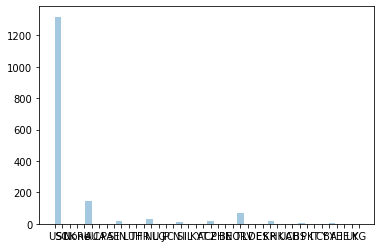

<Figure size 1440x2160 with 0 Axes>

In [34]:
# Your code here
#Grosor de las barras
#websites['WHOIS_COUNTRY'].count().plot(kind = 'bar',alpha = 0.4, width = 0.9,figsize=(9,4))
plt.hist(websites.WHOIS_COUNTRY,alpha = 0.4, width = 0.9)
plt.figure(figsize=(20,30));


In [35]:
websites.WHOIS_COUNTRY.value_counts()[0:15]

US      1104
None     171
CA        83
ES        63
AU        35
UK        34
PA        21
JP        11
CN        10
CZ         9
FR         9
IN         8
NL         6
RU         6
CH         6
Name: WHOIS_COUNTRY, dtype: int64

#### After verifying, now let's keep the top 10 values of the column and re-label other columns with `OTHER`.

In [36]:
# Aplicaremos una lamnda para poder aplicar los cambios en los paises que queden por debajo
#del ranking 10 para sustituirlos por "others", en estos se incluye NONE
paises=['US','CA','ES','AU','UK','PA','JP','CN','CZ','FR']
websites.WHOIS_COUNTRY = websites.WHOIS_COUNTRY.apply(lambda x: x if x in paises else 'OTHER')


In [37]:
websites.WHOIS_COUNTRY.value_counts()

US       1104
OTHER     259
CA         83
ES         63
AU         35
UK         34
PA         21
JP         11
CN         10
FR          9
CZ          9
Name: WHOIS_COUNTRY, dtype: int64

<AxesSubplot:xlabel='WHOIS_COUNTRY', ylabel='count'>

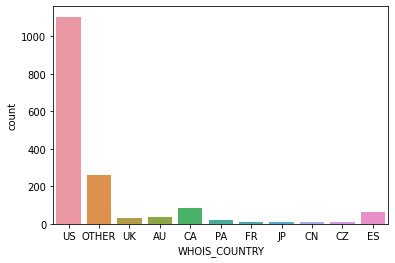

In [38]:
sns.countplot(x='WHOIS_COUNTRY', data= websites)

Now since `WHOIS_COUNTRY` has been re-labelled, we don't need `WHOIS_STATEPRO` any more because the values of the states or provinces may not be relevant any more. We'll drop this column.

In addition, we will also drop `WHOIS_REGDATE` and `WHOIS_UPDATED_DATE`. These are the registration and update dates of the website domains. Not of our concerns.

#### In the next cell, drop `['WHOIS_STATEPRO', 'WHOIS_REGDATE', 'WHOIS_UPDATED_DATE']`.

In [39]:
# Que triste, fue muy tardado cambiar las fechas de las columnas y no se ocuparán jajaja
#sirvió de ejercicio
websites.drop(['WHOIS_STATEPRO', 'WHOIS_REGDATE','WHOIS_UPDATED_DATE'], axis=1,inplace=True)

# Challenge 5 - Handle Remaining Categorical Data & Convert to Ordinal

Now print the `dtypes` of the data again. Besides `WHOIS_COUNTRY` which we already fixed, there should be 3 categorical columns left: `URL`, `CHARSET`, and `SERVER`.

In [40]:
# Your code here
websites.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1638 entries, 3 to 1780
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   URL                        1638 non-null   object 
 1   URL_LENGTH                 1638 non-null   int64  
 2   CHARSET                    1638 non-null   object 
 3   SERVER                     1638 non-null   object 
 4   WHOIS_COUNTRY              1638 non-null   object 
 5   TCP_CONVERSATION_EXCHANGE  1638 non-null   int64  
 6   DIST_REMOTE_TCP_PORT       1638 non-null   int64  
 7   REMOTE_IPS                 1638 non-null   int64  
 8   APP_BYTES                  1638 non-null   int64  
 9   SOURCE_APP_PACKETS         1638 non-null   int64  
 10  SOURCE_APP_BYTES           1638 non-null   int64  
 11  REMOTE_APP_BYTES           1638 non-null   int64  
 12  APP_PACKETS                1638 non-null   int64  
 13  DNS_QUERY_TIMES            1638 non-null   float

#### `URL` is easy. We'll simply drop it because it has too many unique values that there's no way for us to consolidate.

In [41]:
# Your code here
websites.drop('URL', axis=1,inplace=True)

#### Print the unique value counts of `CHARSET`. You see there are only a few unique values. So we can keep it as it is.

In [42]:
# Your code here
websites.CHARSET.value_counts()

UTF-8           603
ISO-8859-1      407
utf-8           357
us-ascii        144
iso-8859-1      117
None              7
windows-1251      1
ISO-8859          1
windows-1252      1
Name: CHARSET, dtype: int64

`SERVER` is a little more complicated. Print its unique values and think about how you can consolidate those values.

#### Before you think of your own solution, don't read the instructions that come next.

In [43]:
websites.SERVER.value_counts()

Apache                                                                                                         356
None                                                                                                           169
nginx                                                                                                          160
Microsoft-HTTPAPI/2.0                                                                                          103
cloudflare-nginx                                                                                                91
                                                                                                              ... 
nginx/1.10.2                                                                                                     1
mw2260.codfw.wmnet                                                                                               1
mw2226.codfw.wmnet                                                              

In [44]:
#websites.SERVER.unique()
#viendo que la mayoria son de servidores Apache, los clasificaría como datos binarios, 
# 0 es otro servidor, 1 es Apache

In [45]:
# Your code here
#servidor=['Apache']
#otros = otros
#websites.SERVER = websites.WHOIS_COUNTRY.apply(lambda x: x if x in servidor else "otros")
#websites.SERVER = websites.WHOIS_COUNTRY.apply(lambda x: x if x in otros else 1)

![Think Hard](../think-hard.jpg)

In [46]:
# Your comment here
#Primero clasificaría a todos los servidores que no contienen Apache como otros o directamente
#con el valor y posterior a todos los que quedan los reemplazo con 1

Although there are so many unique values in the `SERVER` column, there are actually only 3 main server types: `Microsoft`, `Apache`, and `nginx`. Just check if each `SERVER` value contains any of those server types and re-label them. For `SERVER` values that don't contain any of those substrings, label with `Other`.

At the end, your `SERVER` column should only contain 4 unique values: `Microsoft`, `Apache`, `nginx`, and `Other`.

In [47]:
# Acá lo intenté hacer con replace, pero no me reconocía todos los servidores con un mismo
#nombre al principio
#websites.SERVER = websites.SERVER.replace(to_replace = r'^Apache*', value = 'Apache', regex = True) 

In [48]:
websites.SERVER = websites.SERVER.apply(lambda x: re.findall('microsoft|nginx|apache',x.lower())[0]
                                            if re.findall('microsoft|nginx|apache',x.lower()) else 'other')

In [49]:
# Count `SERVER` value counts here
websites.SERVER.value_counts()

apache       594
other        490
nginx        372
microsoft    182
Name: SERVER, dtype: int64

In [50]:
websites[websites.SERVER == 'apache']

,URL_LENGTH,CHARSET,SERVER,WHOIS_COUNTRY,TCP_CONVERSATION_EXCHANGE,DIST_REMOTE_TCP_PORT,REMOTE_IPS,APP_BYTES,SOURCE_APP_PACKETS,SOURCE_APP_BYTES,REMOTE_APP_BYTES,APP_PACKETS,DNS_QUERY_TIMES,Type
6,18,iso-8859-1,apache,US,12,0,3,1189,14,8559,1327,14,2.0,0
10,20,utf-8,apache,US,0,0,0,0,0,0,0,0,0.0,0
15,21,ISO-8859-1,apache,UK,7,0,1,717,11,1960,1011,11,4.0,1
22,22,iso-8859-1,apache,OTHER,4,3,2,420,4,372,420,4,0.0,0
23,22,utf-8,apache,AU,12,0,2,2259,16,5165,2559,16,4.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1773,178,UTF-8,apache,ES,0,0,0,0,0,186,0,0,0.0,1
1775,194,UTF-8,apache,ES,0,0,0,0,0,186,0,0,0.0,1
1776,194,UTF-8,apache,ES,0,0,0,0,0,186,0,0,0.0,1
1777,198,UTF-8,apache,ES,0,0,0,0,0,124,0,0,0.0,1


In [51]:
websites.shape

(1638, 14)

OK, all our categorical data are fixed now. **Let's convert them to ordinal data using Pandas' `get_dummies` function ([documentation](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html)).** Make sure you drop the categorical columns by passing `drop_first=True` to `get_dummies` as we don't need them any more. **Also, assign the data with dummy values to a new variable `website_dummy`.**

In [52]:
# pregunta: vale la pena borrar la primera columna en una variable que tiene más de 8 categorías ? 
#no complica la identificación de la misma?
websites_dummies = pd.get_dummies(websites, columns=['CHARSET','SERVER','WHOIS_COUNTRY'], drop_first=True)


Now, inspect `website_dummy` to make sure the data and types are intended - there shouldn't be any categorical columns at this point.

In [53]:
# Your code here
websites_dummies.head()

,URL_LENGTH,TCP_CONVERSATION_EXCHANGE,DIST_REMOTE_TCP_PORT,REMOTE_IPS,APP_BYTES,SOURCE_APP_PACKETS,SOURCE_APP_BYTES,REMOTE_APP_BYTES,APP_PACKETS,DNS_QUERY_TIMES,Type,CHARSET_ISO-8859-1,CHARSET_None,CHARSET_UTF-8,CHARSET_iso-8859-1,CHARSET_us-ascii,CHARSET_utf-8,CHARSET_windows-1251,CHARSET_windows-1252,SERVER_microsoft,SERVER_nginx,SERVER_other,WHOIS_COUNTRY_CA,WHOIS_COUNTRY_CN,WHOIS_COUNTRY_CZ,WHOIS_COUNTRY_ES,WHOIS_COUNTRY_FR,WHOIS_COUNTRY_JP,WHOIS_COUNTRY_OTHER,WHOIS_COUNTRY_PA,WHOIS_COUNTRY_UK,WHOIS_COUNTRY_US
3,17,31,22,3,3812,39,18784,4380,39,8.0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
4,17,57,2,5,4278,61,129889,4586,61,4.0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
5,18,11,6,9,894,11,838,894,11,0.0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0
6,18,12,0,3,1189,14,8559,1327,14,2.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
7,19,0,0,0,0,0,0,0,0,0.0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1


In [54]:
#Como die la documentación, drop_firts = True lo que hace es eliminar la primera columna de
#los dummies que estamos creando, es por eso que SERVER en lugar de ser 11 columans son 10,
# DE CHARSET enlugar de ser 9 columans son 8 y así 
websites_dummies.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1638 entries, 3 to 1780
Data columns (total 32 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   URL_LENGTH                 1638 non-null   int64  
 1   TCP_CONVERSATION_EXCHANGE  1638 non-null   int64  
 2   DIST_REMOTE_TCP_PORT       1638 non-null   int64  
 3   REMOTE_IPS                 1638 non-null   int64  
 4   APP_BYTES                  1638 non-null   int64  
 5   SOURCE_APP_PACKETS         1638 non-null   int64  
 6   SOURCE_APP_BYTES           1638 non-null   int64  
 7   REMOTE_APP_BYTES           1638 non-null   int64  
 8   APP_PACKETS                1638 non-null   int64  
 9   DNS_QUERY_TIMES            1638 non-null   float64
 10  Type                       1638 non-null   int64  
 11  CHARSET_ISO-8859-1         1638 non-null   uint8  
 12  CHARSET_None               1638 non-null   uint8  
 13  CHARSET_UTF-8              1638 non-null   uint8

# Challenge 6 - Modeling, Prediction, and Evaluation

We'll start off this section by splitting the data to train and test. **Name your 4 variables `X_train`, `X_test`, `y_train`, and `y_test`. Select 80% of the data for training and 20% for testing.**

In [55]:
from sklearn.model_selection import train_test_split

# Your code here:

x = websites_dummies.drop('Type', axis = 1).copy()
y = websites_dummies.Type
X_train, X_test, y_train, y_test = train_test_split(x, y, random_state =1, test_size = 0.2)


#### In this lab, we will try two different models and compare our results.

The first model we will use in this lab is logistic regression. We have previously learned about logistic regression as a classification algorithm. In the cell below, load `LogisticRegression` from scikit-learn and initialize the model.

In [56]:
# Your code here:
from sklearn.linear_model import LogisticRegression
#liblinear es una buena elección cuanto tenemos datasets pequeños, pero asi como en el portal
#podemos no ponerlo, lo probé con y sin, y se pro bo con max_iter y sin max_iter
#qué es pequeño?

websites_model = LogisticRegression(max_iter=8000)


Next, fit the model to our training data. We have already separated our data into 4 parts. Use those in your model.

In [57]:
# Your code here:
#me pedía incrementar el numero de iteraciones por eso le puse 8 mil 

websites_model.fit(X_train,y_train)

LogisticRegression(max_iter=8000)

finally, import `confusion_matrix` and `accuracy_score` from `sklearn.metrics` and fit our testing data. Assign the fitted data to `y_pred` and print the confusion matrix as well as the accuracy score

In [58]:
# Your code here:
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import plot_confusion_matrix

y_pred = websites_model.predict(X_test)
df_predicted = pd.DataFrame({'Actual':y_test, 'Predicted':y_pred})
df_predicted

,Actual,Predicted
1739,1,1
1766,0,0
127,0,0
458,0,0
472,0,0
...,...,...
1242,0,0
650,0,0
558,0,0
1496,0,0


In [59]:
#siempre es así 
accuracy = accuracy_score(y_test,y_pred)
accuracy

0.9390243902439024

In [60]:
#Tener presente el score, esto está mal porque no comparo predicción
#websites_model.score(X_test,y_test)

In [61]:
websites_model.score(X_train,y_train)

0.9511450381679389

In [62]:
confusion_matrix(y_test,y_pred)

array([[293,   2],
       [ 18,  15]])

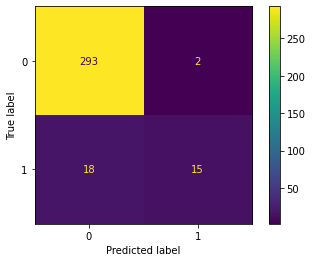

In [64]:
plot_confusion_matrix(websites_model, X_test, y_test)

What are your thoughts on the performance of the model? Write your conclusions below.

In [ ]:
# SIN MAX ITER:
#quiere decir que 295 no son malisiosos (verdaderos positivos) y 0 que no hubo falsos positivos
# 33 son los que no son malisiosos pero los califico como "malisiosos", y 0 son lo que si son malisosos

#CON MAX ITER:

##quiere decir que 293 no son malisiosos (verdaderos negativos) y 2 que hubo falsos positivos (los calificó como positivos)
# 18 son los que SI SON malisiosos pero los califico como " NO malisiosos" (falsos negativos), y 15 SI SON  malisiosos (verdaderos positivos)


#tendría que aumentar el numero de iteracione spara mejorar mi modelo, por ahora lo tengo con un score
#de 93%

#### Our second algorithm is is K-Nearest Neighbors. 

Though is it not required, we will fit a model using the training data and then test the performance of the model using the testing data. Start by loading `KNeighborsClassifier` from scikit-learn and then initializing and fitting the model. We'll start off with a model where k=3.

In [65]:
# importamos
from sklearn import neighbors

In [66]:
num_neighbors = 3
#Uniforme = Cada vecino tiene el mismo peso
#Distancia = Los vecinos mas cercanos tienen más peso

classifier = neighbors.KNeighborsClassifier(num_neighbors, weights='distance')
classifier.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3, weights='distance')

To test your model, compute the predicted values for the testing sample and print the confusion matrix as well as the accuracy score.

In [67]:
# Your code here:
y_pred_knn = classifier.predict(X_test)
df_predicted_knn = pd.DataFrame({'Actual':y_test, 'Predicted':y_pred_knn})
df_predicted_knn

,Actual,Predicted
1739,1,1
1766,0,0
127,0,0
458,0,0
472,0,0
...,...,...
1242,0,0
650,0,0
558,0,0
1496,0,0


In [68]:
accuracy_knn = accuracy_score(y_test,y_pred_knn)
accuracy_knn

0.9664634146341463

In [69]:
confusion_matrix(y_test,y_pred_knn)

array([[293,   2],
       [  9,  24]])

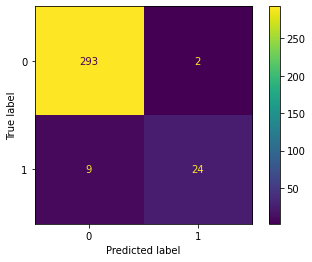

In [70]:
plot_confusion_matrix(classifier, X_test, y_test)

In [ ]:
##quiere decir que 293 no son malisiosos (verdaderos negativos) y 2 que hubo falsos positivos (los calificó como positivos pero realmente son negativos)
# 9 son los que SI SON malisiosos pero los califico como " NO malisiosos" (falsos negativos), y 24 SI SON  malisiosos (verdaderos positivos)

#### We'll create another K-Nearest Neighbors model with k=5. 

Initialize and fit the model below and print the confusion matrix and the accuracy score.

In [ ]:
# Your code here:
num_neighbors_otro = 5
#Uniforme = Cada vecino tiene el mismo peso
#Distancia = Los vecinos mas cercanos tienen más peso

classifier_otro = neighbors.KNeighborsClassifier(num_neighbors_otro, weights='distance')
classifier_otro.fit(X_train,y_train)
y_pred_knn_otro = classifier_otro.predict(X_test)
plot_confusion_matrix(classifier_otro, X_test, y_test)

In [ ]:
confusion_matrix(y_test,y_pred_knn_otro)

In [ ]:
accuracy_knn_otro = accuracy_score(y_test,y_pred_knn_otro)
accuracy_knn_otro

Did you see an improvement in the confusion matrix when increasing k to 5? Did you see an improvement in the accuracy score? Write your conclusions below.

In [ ]:
# Your conclusions here:
#Mejora la predicción, incluso hice el ejercicio con un K=12 y el accuracy salia de 0.96, pero
#con k=5 sale con mucho mejor puntuación de 0.97 y menos falsos negativos 

# Bonus Challenge - Feature Scaling

Problem-solving in machine learning is iterative. You can improve your model prediction with various techniques (there is a sweetspot for the time you spend and the improvement you receive though). Now you've completed only one iteration of ML analysis. There are more iterations you can conduct to make improvements. In order to be able to do that, you will need deeper knowledge in statistics and master more data analysis techniques. In this bootcamp, we don't have time to achieve that advanced goal. But you will make constant efforts after the bootcamp to eventually get there.

However, now we do want you to learn one of the advanced techniques which is called *feature scaling*. The idea of feature scaling is to standardize/normalize the range of independent variables or features of the data. This can make the outliers more apparent so that you can remove them. This step needs to happen during Challenge 6 after you split the training and test data because you don't want to split the data again which makes it impossible to compare your results with and without feature scaling. For general concepts about feature scaling, click [here](https://en.wikipedia.org/wiki/Feature_scaling). To read deeper, click [here](https://medium.com/greyatom/why-how-and-when-to-scale-your-features-4b30ab09db5e).

In the next cell, attempt to improve your model prediction accuracy by means of feature scaling. A library you can utilize is `sklearn.preprocessing.RobustScaler` ([documentation](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.RobustScaler.html)). You'll use the `RobustScaler` to fit and transform your `X_train`, then transform `X_test`. You will use logistic regression to fit and predict your transformed data and obtain the accuracy score in the same way. Compare the accuracy score with your normalized data with the previous accuracy data. Is there an improvement?

In [ ]:
# Your code here